In [566]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Reading Data

In [567]:
file_dir = Path.cwd()
data_dir = file_dir.parent / 'data'
data = pd.read_csv(data_dir / 'housing.csv')


In [568]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Data Exploration

In [569]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [570]:
data.dropna(inplace=True)

In [571]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [572]:
x = data.drop(columns=['median_house_value'])
y = data['median_house_value']

In [573]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [574]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [575]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [576]:
train_data = x_train.join(y_train)

In [577]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11941,-117.42,33.94,26.0,2420.0,532.0,1383.0,469.0,3.5403,INLAND,113500.0
7152,-118.16,34.03,41.0,1377.0,293.0,1142.0,272.0,3.1724,<1H OCEAN,141600.0
17624,-121.95,37.26,10.0,3611.0,803.0,1599.0,716.0,5.2000,<1H OCEAN,248700.0
4787,-118.32,34.02,52.0,2511.0,587.0,1660.0,546.0,2.6098,<1H OCEAN,127100.0
5509,-118.41,33.99,39.0,3014.0,822.0,3212.0,777.0,1.1985,<1H OCEAN,215000.0
...,...,...,...,...,...,...,...,...,...,...
15531,-117.12,33.15,7.0,2810.0,464.0,1564.0,457.0,4.4655,<1H OCEAN,182800.0
19663,-120.84,37.49,25.0,2383.0,576.0,1234.0,583.0,1.4529,INLAND,86100.0
1898,-120.01,38.91,17.0,2732.0,609.0,1005.0,499.0,1.9851,INLAND,86700.0
2240,-119.81,36.83,19.0,6789.0,1200.0,2325.0,1109.0,4.0490,INLAND,126000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

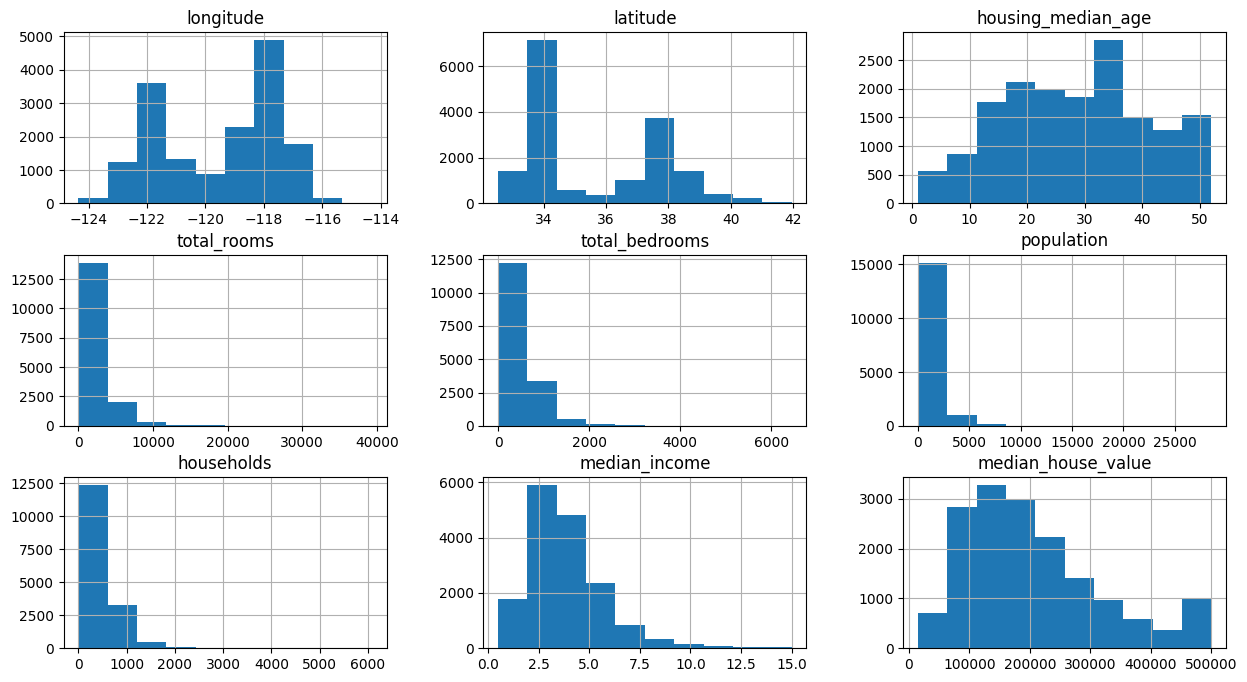

In [578]:
train_data.hist(figsize=(15, 8))

In [579]:
train_data.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924207,-0.109868,0.047246,0.071262,0.102679,0.057841,-0.016247,-0.047475
latitude,-0.924207,1.000000,0.012448,-0.037694,-0.067351,-0.111279,-0.072622,-0.079236,-0.143259
housing_median_age,-0.109868,0.012448,1.000000,-0.360578,-0.322185,-0.301485,-0.304667,-0.120299,0.105320
total_rooms,0.047246,-0.037694,-0.360578,1.000000,0.930316,0.861435,0.917381,0.197489,0.131515
total_bedrooms,0.071262,-0.067351,-0.322185,0.930316,1.000000,0.882443,0.978036,-0.007427,0.045806
population,0.102679,-0.111279,-0.301485,0.861435,0.882443,1.000000,0.913315,0.006600,-0.026454
households,0.057841,-0.072622,-0.304667,0.917381,0.978036,0.913315,1.000000,0.013963,0.062036
median_income,-0.016247,-0.079236,-0.120299,0.197489,-0.007427,0.006600,0.013963,1.000000,0.691329
median_house_value,-0.047475,-0.143259,0.105320,0.131515,0.045806,-0.026454,0.062036,0.691329,1.000000


<Axes: >

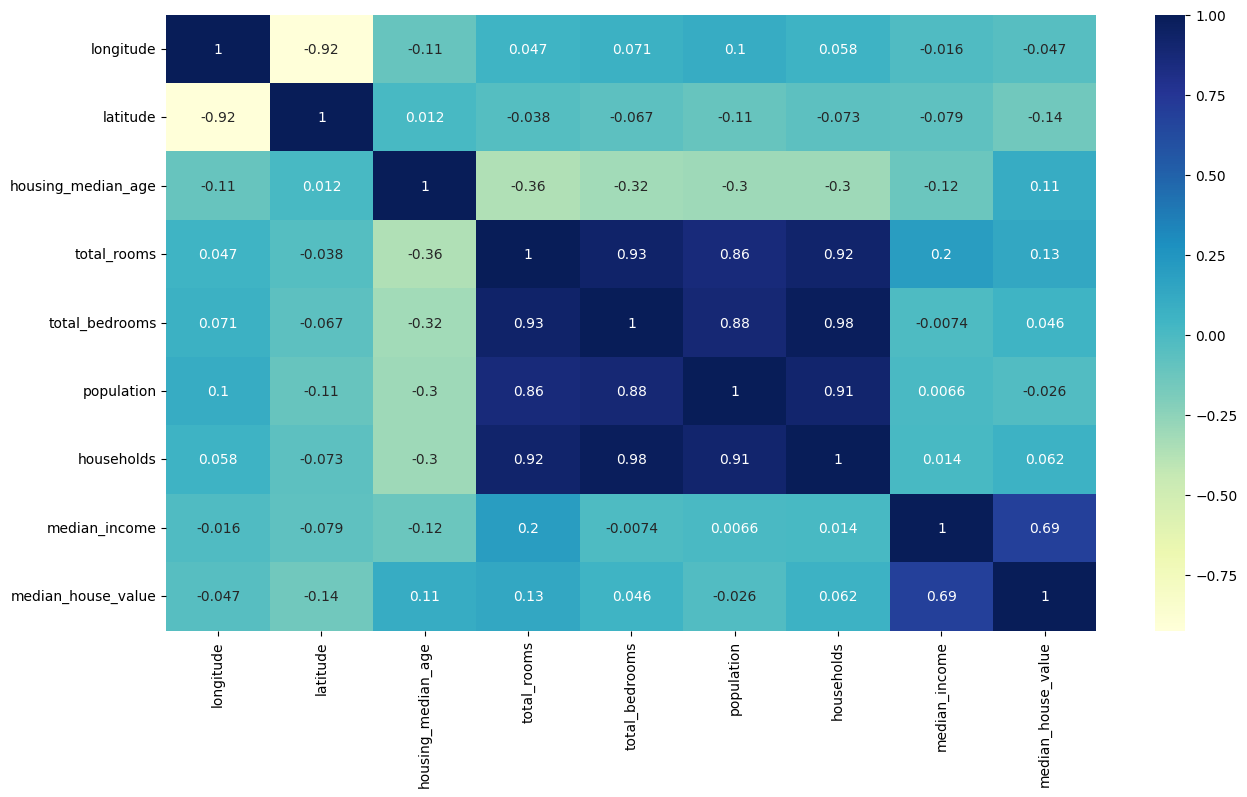

In [580]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

# Pre-Processing

**The 'total_rooms', 'total_bedrooms', 'populations', 'households' these four features seemed to be right skewed, so taking log for those features**

In [581]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

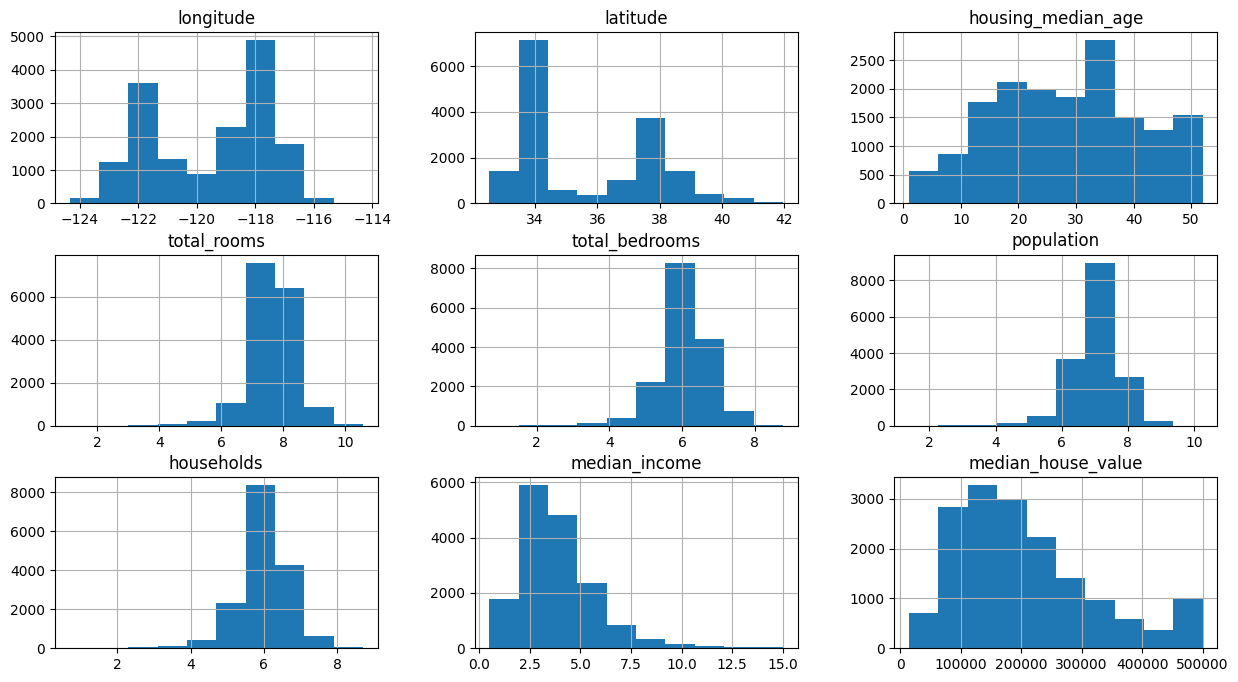

In [582]:
train_data.hist(figsize=(15, 8))

In [583]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7196
INLAND        5220
NEAR OCEAN    2122
NEAR BAY      1804
ISLAND           4
Name: count, dtype: int64

In [584]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(columns=['ocean_proximity'], axis=1)

<Axes: >

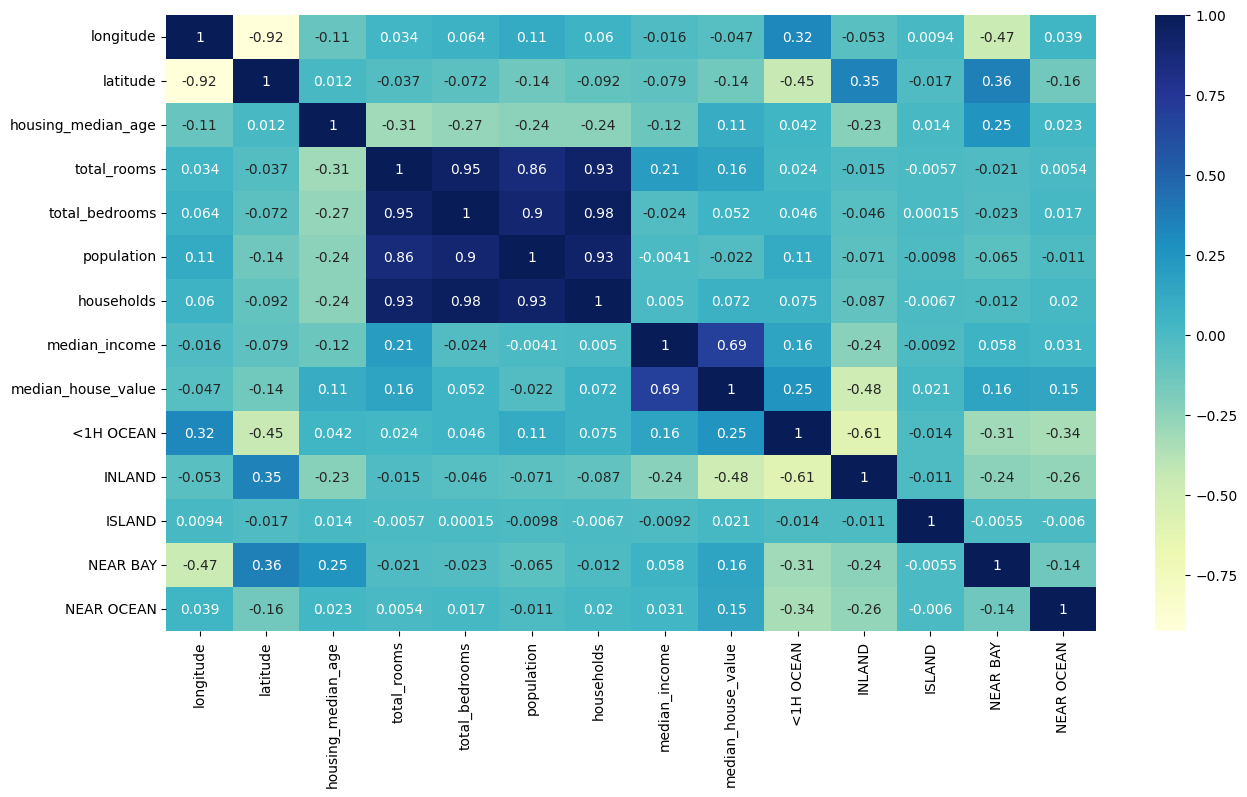

In [585]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

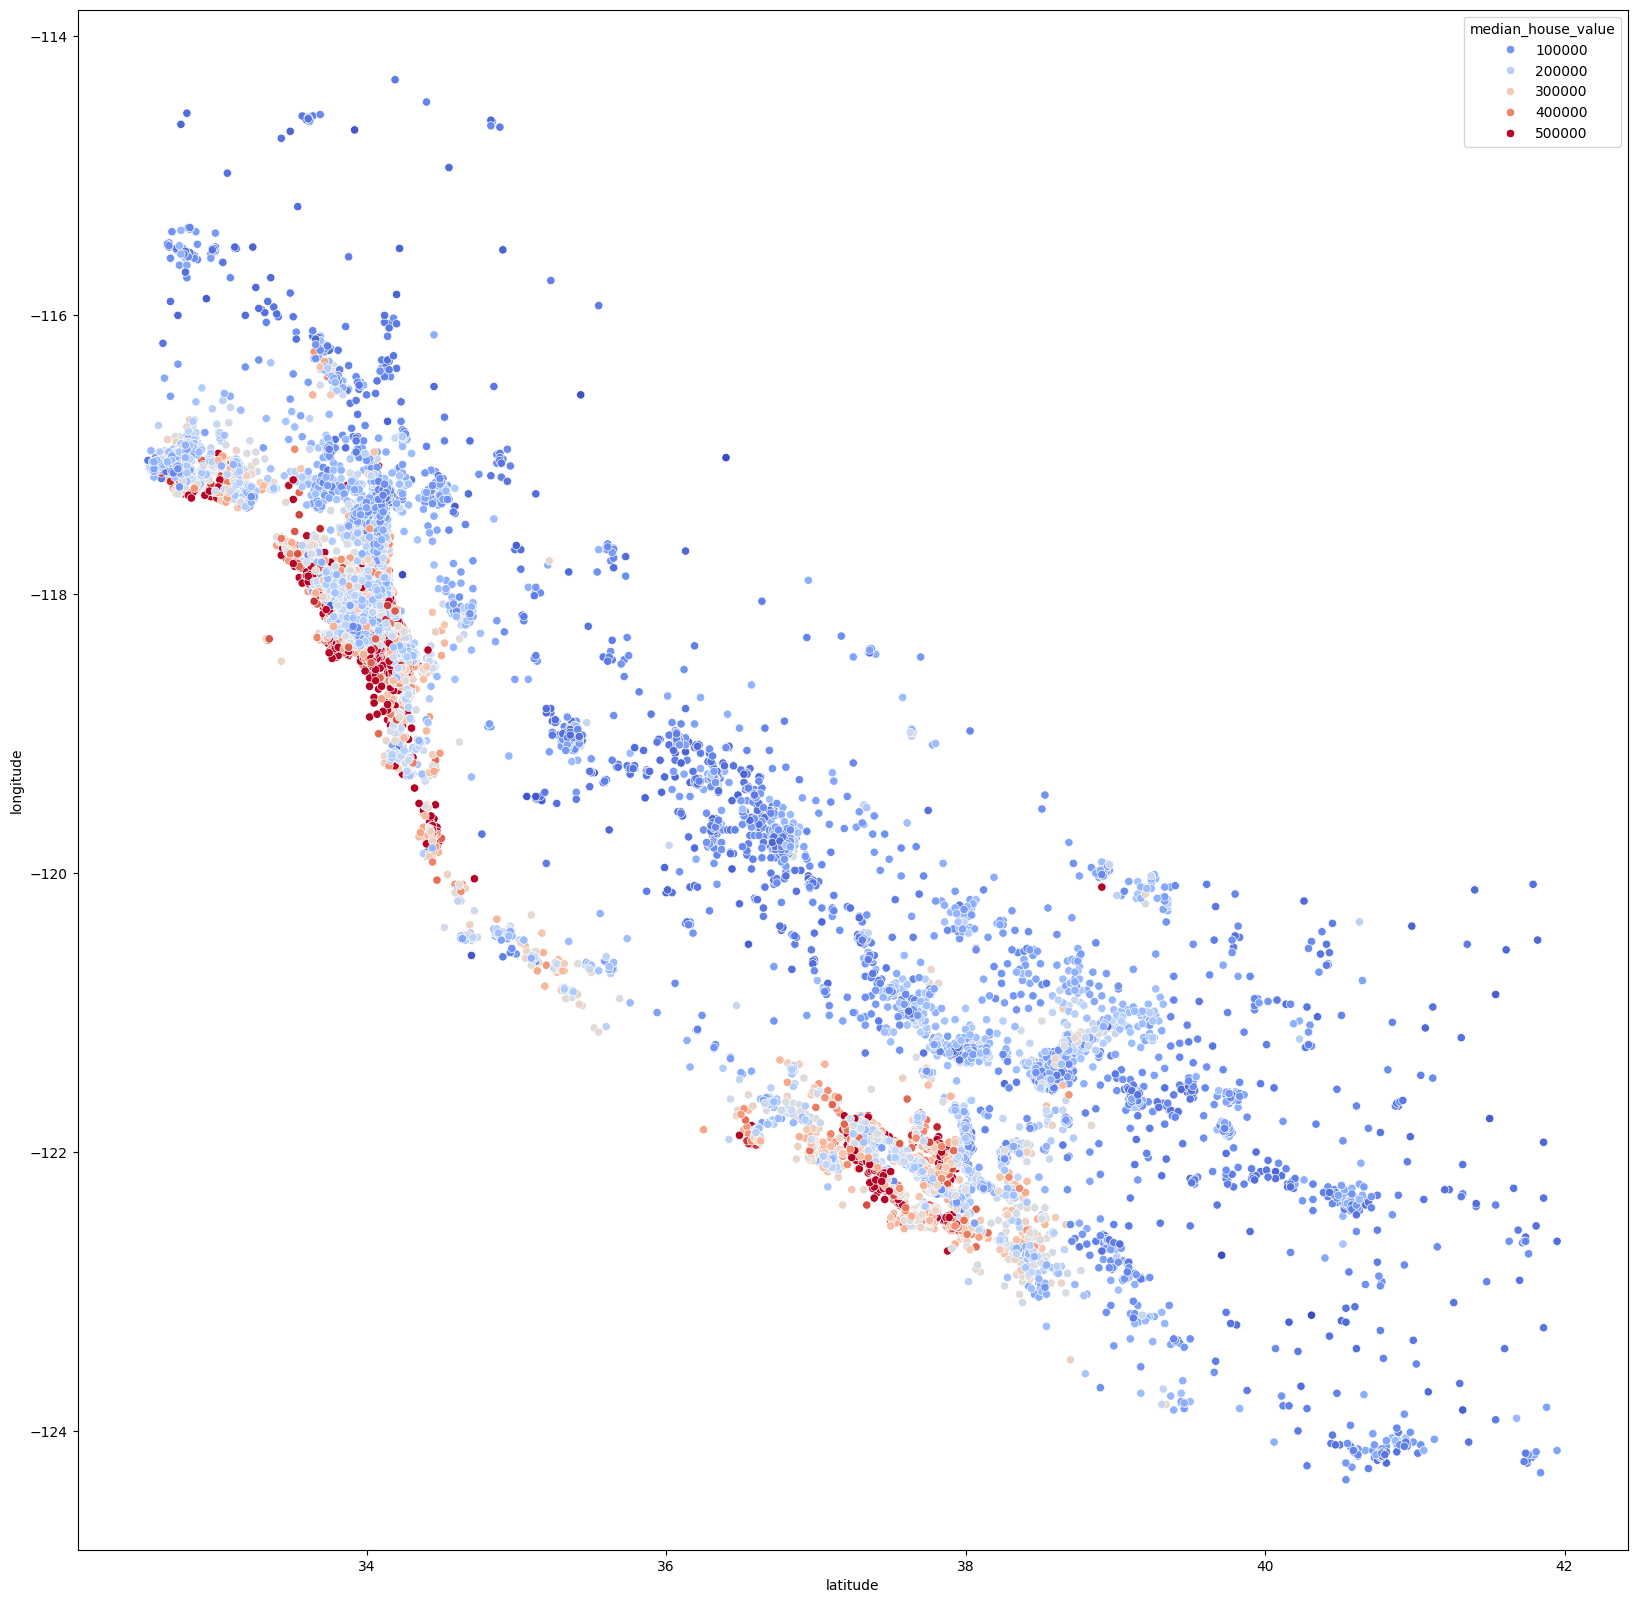

In [586]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

# Feature engineering

In [587]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
# train_data['population_per_household'] = train_data['population'] / train_data['households']
train_data['rooms_per_household'] = train_data['total_rooms'] / train_data['households']

<Axes: >

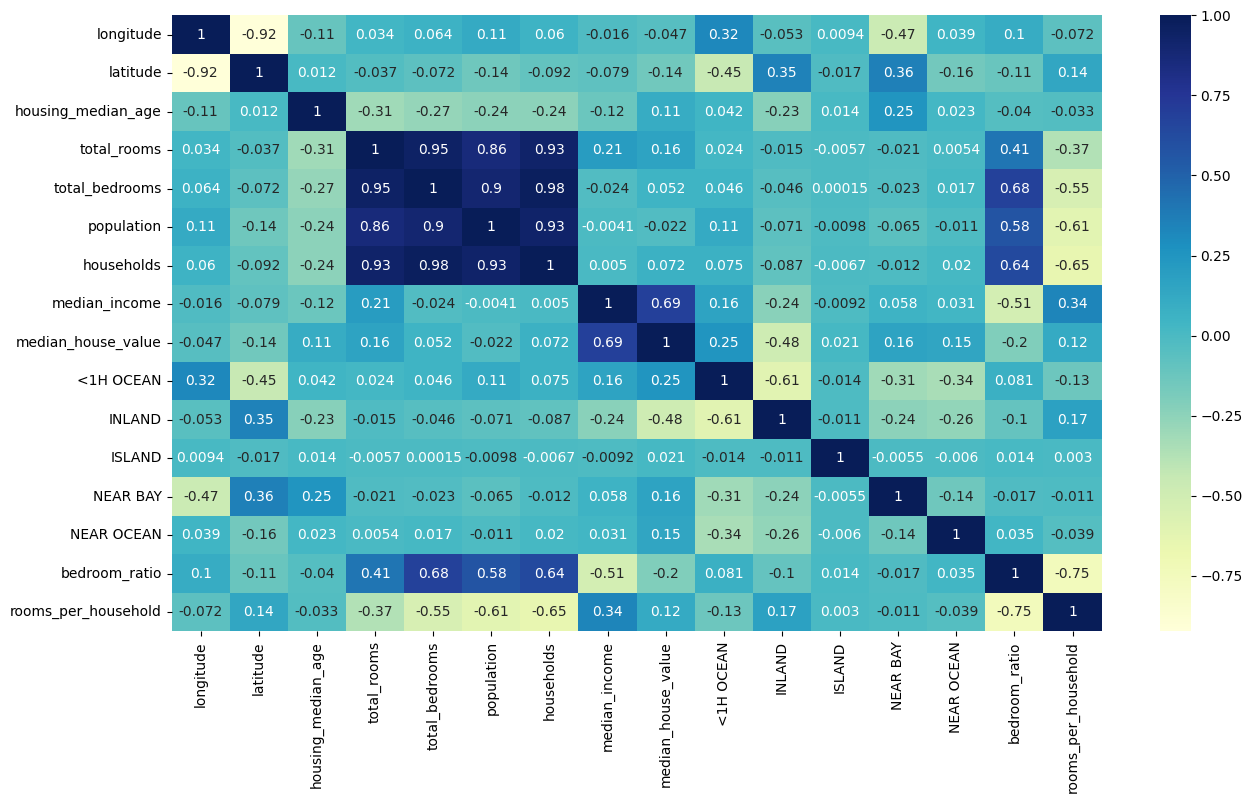

In [588]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

# Training Models

**Linear Regression**

In [589]:
scaler = StandardScaler()

x_train, y_train = train_data.drop(columns=['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)


reg = LinearRegression()

reg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [590]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(columns=['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
# test_data['population_per_household'] = test_data['population'] / test_data['households']
test_data['rooms_per_household'] = test_data['total_rooms'] / test_data['households']


In [591]:

x_test, y_test = test_data.drop(columns=['median_house_value'], axis=1), test_data['median_house_value']

In [592]:
x_test_s = scaler.transform(x_test)

In [593]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,rooms_per_household
1975,-120.72,38.57,8.0,6.794587,5.225747,6.059123,5.105945,2.6833,118800.0,False,True,False,False,False,0.769104,1.330721
77,-122.28,37.81,19.0,7.096721,5.497168,6.582025,5.337538,1.1111,108300.0,False,False,False,True,False,0.774607,1.329587
5444,-118.43,34.00,30.0,7.672758,6.393591,7.201916,6.327937,3.3995,324000.0,True,False,False,False,False,0.833285,1.212521
5354,-118.41,34.03,33.0,7.456455,5.958425,6.902743,5.897154,3.7277,500001.0,True,False,False,False,False,0.799096,1.264416
20097,-120.23,37.98,14.0,7.578145,5.910797,6.822197,5.758902,3.1523,93300.0,False,True,False,False,False,0.779979,1.315901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671,-118.29,34.05,11.0,6.519147,5.916202,7.042286,5.834811,2.3864,350000.0,True,False,False,False,False,0.907512,1.117285
3920,-118.56,34.20,36.0,7.342779,5.733341,6.793466,5.659482,4.1750,190900.0,True,False,False,False,False,0.780814,1.297430
13222,-117.71,34.03,11.0,8.151333,6.620073,7.679714,6.517671,3.4267,164400.0,False,True,False,False,False,0.812146,1.250651
5962,-117.84,34.12,34.0,7.614312,5.846439,7.041412,5.808142,4.3920,187600.0,False,True,False,False,False,0.767822,1.310972


In [594]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,rooms_per_household
11941,-117.42,33.94,26.0,7.791936,6.278521,7.232733,6.152733,3.5403,113500.0,False,True,False,False,False,0.805772,1.266419
7152,-118.16,34.03,41.0,7.228388,5.683580,7.041412,5.609472,3.1724,141600.0,True,False,False,False,False,0.786286,1.288604
17624,-121.95,37.26,10.0,8.192017,6.689599,7.377759,6.575076,5.2000,248700.0,True,False,False,False,False,0.816600,1.245920
4787,-118.32,34.02,52.0,7.828835,6.376727,7.415175,6.304449,2.6098,127100.0,True,False,False,False,False,0.814518,1.241795
5509,-118.41,33.99,39.0,8.011355,6.712956,8.074960,6.656727,1.1985,215000.0,True,False,False,False,False,0.837930,1.203498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15531,-117.12,33.15,7.0,7.941296,6.142037,7.355641,6.126869,4.4655,182800.0,True,False,False,False,False,0.773430,1.296143
19663,-120.84,37.49,25.0,7.776535,6.357842,7.118826,6.369901,1.4529,86100.0,False,True,False,False,False,0.817567,1.220825
1898,-120.01,38.91,17.0,7.913155,6.413459,6.913737,6.214608,1.9851,86700.0,False,True,False,False,False,0.810481,1.273315
2240,-119.81,36.83,19.0,8.823206,7.090910,7.751905,7.012115,4.0490,126000.0,False,True,False,False,False,0.803666,1.258280


In [595]:
reg.score(x_test, y_test)

0.6671985670920461

**Ensemble model with Random Forest**

In [596]:
forest = RandomForestRegressor()

forest.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [597]:
forest.score(x_test, y_test)

0.8159763703711469

In [598]:
forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [599]:
forest.score(x_test_s, y_test)

0.8162106695640571

In [600]:
from sklearn.model_selection import GridSearchCV

param_grid = {    
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'max_depth': [None, 10, 20, 30],
}

grid_search = GridSearchCV(forest, param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True)

grid_search.fit(x_train_s, y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [None, 10, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,200


In [601]:
best_forest = grid_search.best_estimator_

In [602]:
best_forest.score(x_test_s, y_test)

0.8160714016169075